In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from kuma_llm_utils.llm import (
    OpenAIClient, OpenAIVisionWorker, 
    AnthropicClient, AnthropicVisionWorker,
    GoogleAIClient, GoogleAIVisionWorker)

In [3]:
import os

os.environ['ANTHROPIC_API_KEY'] = "ENTER_YOUR_API_KEY"
os.environ['OPENAI_API_KEY'] = "ENTER_YOUR_API_KEY"
os.environ['GOOGLE_AI_API_KEY']= "ENTER_YOUR_API_KEY"

# Load clients

In [4]:
openai_engine = OpenAIClient()
anthropic_engine = AnthropicClient()
google_engine = GoogleAIClient()

# Define the task

In [5]:
sample_prompt = '''\
Answer to the following questions based on the attached image:
1. {question1}
2. {question2}
'''

In [6]:
import io
import requests
from PIL import Image

sample_image = Image.open(io.BytesIO(requests.get(
    'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg').content))

inference_image = Image.open(io.BytesIO(requests.get(
    'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/MtFuji_FujiCity.jpg/800px-MtFuji_FujiCity.jpg').content))

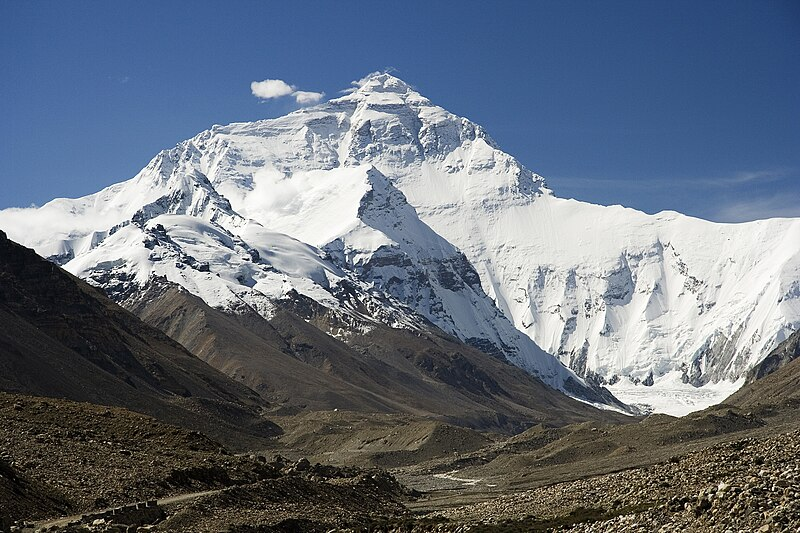

In [7]:
sample_image

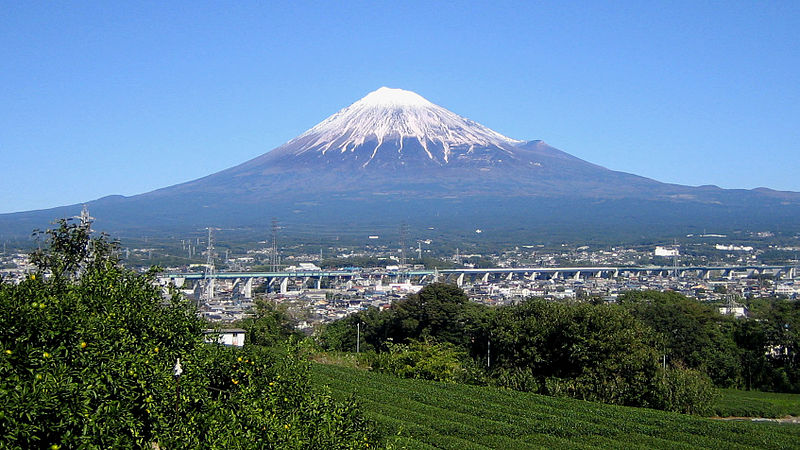

In [8]:
inference_image

In [9]:
openai_worker = OpenAIVisionWorker(
    engine=openai_engine, 
    prompt_template=sample_prompt,
    generation_params={'model': 'gpt-4o'})

anthropic_worker = AnthropicVisionWorker(
    engine=anthropic_engine, 
    prompt_template=sample_prompt,
    generation_params={'model': 'claude-3-5-sonnet-latest', 'max_tokens': 256})

gemini_worker = GoogleAIVisionWorker(
    engine=google_engine, 
    prompt_template=sample_prompt,
    generation_params={'model': 'gemini-2.0-flash-exp'})

# Generate!
You can pass either url, local path, or PIL.Image object.

In [10]:
print(await openai_worker.generate([
    {
        'role': 'user',
        'question1': 'What is the mountain in the image?',
        'question2': 'How tall is the mountain in the image?',
        'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'
    }, 
    {
        'role': 'assistant',
        'text': '1. Mt.Everest\n2. 8848m'
    },
    {
        'role': 'user',
        'question1': 'What is the mountain in the image?',
        'question2': 'How tall is the mountain in the image?',
        'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/MtFuji_FujiCity.jpg/800px-MtFuji_FujiCity.jpg'
    }
]))

2025-01-28 18:43:42,973 - 77   - INFO     - OpenAIClient |  gpt-4o {'request': 1, 'token': 467}


1. Mt. Fuji
2. 3776 meters


In [11]:
print(await anthropic_worker.generate([
    {
        'role': 'user',
        'question1': 'What is the mountain in the image?',
        'question2': 'How tall is the mountain in the image?',
        'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'
    }, 
    {
        'role': 'assistant',
        'text': '1. Mt.Everest\n2. 8848m'
    },
    {
        'role': 'user',
        'question1': 'What is the mountain in the image?',
        'question2': 'How tall is the mountain in the image?',
        'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/MtFuji_FujiCity.jpg/800px-MtFuji_FujiCity.jpg'
    }
]))

2025-01-28 18:43:48,536 - 83   - INFO     - AnthropicClient |  claude-3-5-sonnet-latest {'request': 1, 'input_token': 1175, 'output_token': 117}


1. This is Mount Fuji (富士山, Fujisan), Japan's highest mountain and most iconic peak.
2. Mount Fuji has an elevation of 3,776 meters (12,388 feet) above sea level.

The image shows the characteristic conical shape of Mount Fuji with its snow-capped peak against a clear blue sky, overlooking an urban area. It's a stratovolcano that has become one of Japan's most recognizable symbols and a UNESCO World Heritage site.


In [12]:
print(await gemini_worker.generate([
    {
        'role': 'user',
        'question1': 'What is the mountain in the image?',
        'question2': 'How tall is the mountain in the image?',
        'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'
    }, 
    {
        'role': 'assistant',
        'text': '1. Mt.Everest\n2. 8848m'
    },
    {
        'role': 'user',
        'question1': 'What is the mountain in the image?',
        'question2': 'How tall is the mountain in the image?',
        'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/MtFuji_FujiCity.jpg/800px-MtFuji_FujiCity.jpg'
    }
]))

2025-01-28 18:43:53,313 - 70   - INFO     - GoogleAIClient |  gemini-2.0-flash-exp {'request': 1, 'input_token': 604, 'output_token': 13}
INFO:default:GoogleAIClient |  gemini-2.0-flash-exp {'request': 1, 'input_token': 604, 'output_token': 13}


1. Mount Fuji
2. 3776 m
